- Nama: Raden Rizki
- Kelas: TI - 3F
- No. Absen: 25

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Kuis 1

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban Anda dan buktikan!

- Berdasarkan hasil dibawah ini, jumlah setiap data cukup bervariasi namun masih dengan selisih setiap datanya tidak jauh, dengan jumlah data di antara 6300 sampai 7877

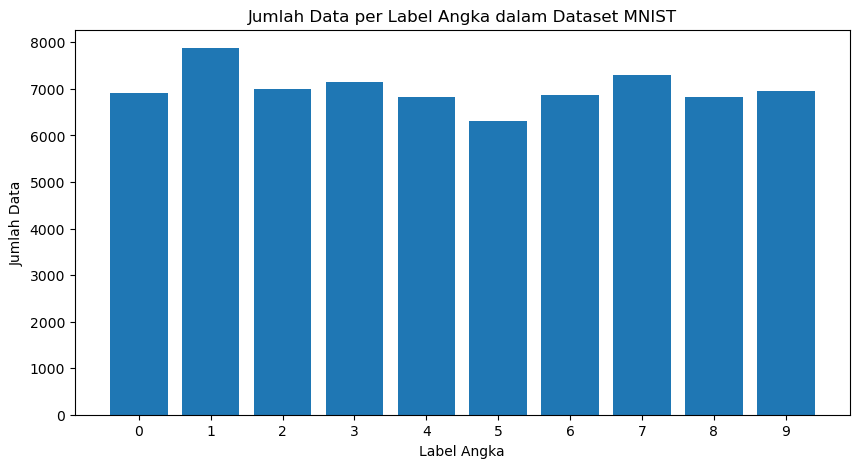

Jumlah data per label angka:
{'0': 6903, '1': 7877, '2': 6990, '3': 7141, '4': 6824, '5': 6313, '6': 6876, '7': 7293, '8': 6825, '9': 6958}


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil label dari dataset MNIST
labels = mnist.target.astype(np.uint8)

# Hitung jumlah data untuk setiap label angka
label_counts = np.bincount(labels)

# Tampilkan grafik jumlah data per label
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts, tick_label=np.arange(10))
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Label Angka dalam Dataset MNIST')
plt.show()

# Tampilkan jumlah data per label dalam bentuk tabel
label_counts_table = {str(i): label_counts[i] for i in range(10)}
print("Jumlah data per label angka:")
print(label_counts_table)


2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

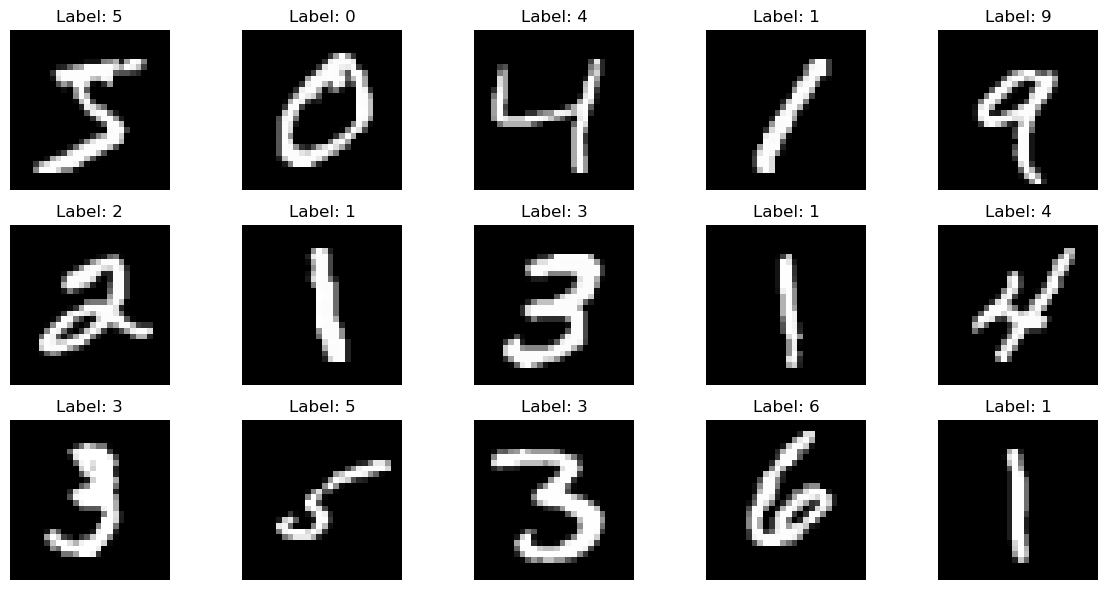

In [5]:
# Ambil gambar pertama dan labelnya
images, labels = mnist["data"].to_numpy(), mnist["target"].to_numpy()

# Tampilkan 15 citra pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [6]:
from sklearn.preprocessing import StandardScaler

# Menggunakan nilai asli dari citra
# Melakukan ekstraksi fitur dengan meratakan setiap citra
X = images.astype('float32')
y = labels.astype('int')

X = X[0:7000]
y = y[0:7000]

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [7]:
from sklearn.model_selection import train_test_split

# Pembagian data dengan rasio 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=100)

# Pembagian data dengan rasio 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=100)

# Pembagian data dengan rasio 90:10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=100)

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [25]:
from sklearn.naive_bayes import GaussianNB

# Buat objek klasifikasi Naive Bayes
naive_bayes_classifier_70_30 = GaussianNB()
naive_bayes_classifier_80_20 = GaussianNB()
naive_bayes_classifier_90_10 = GaussianNB()

# Rasio 70:30

# Latih model pada data pelatihan
naive_bayes_classifier_70_30.fit(X_train_70, y_train_70)

# Prediksi pada data pengujian
y_pred_nb_70_30 = naive_bayes_classifier_70_30.predict(X_test_30)

# Rasio 80:20

# Latih model pada data pelatihan
naive_bayes_classifier_80_20.fit(X_train_80, y_train_80)

# Prediksi pada data pengujian
y_pred_nb_80_20 = naive_bayes_classifier_80_20.predict(X_test_20)

# Rasio 90:10

# Latih model pada data pelatihan
naive_bayes_classifier_90_10.fit(X_train_90, y_train_90)

# Prediksi pada data pengujian
y_pred_nb_90_10 = naive_bayes_classifier_90_10.predict(X_test_10)


In [26]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid_70_30 = GridSearchCV(model, param_grid)
grid_80_20 = GridSearchCV(model, param_grid)
grid_90_10 = GridSearchCV(model, param_grid)

# Rasio 70:30

%time grid_70_30.fit(X_train_70, y_train_70)
print(grid_70_30.best_params_)
print(grid_70_30.best_score_)

CPU times: total: 2min 10s
Wall time: 3min 51s
{'svc__C': 10, 'svc__gamma': 0.005}
0.920204081632653


In [27]:
# Rasio 80:20

%time grid_80_20.fit(X_train_80, y_train_80)
print(grid_80_20.best_params_)
print(grid_80_20.best_score_)

CPU times: total: 2min 45s
Wall time: 5min 19s
{'svc__C': 5, 'svc__gamma': 0.005}
0.9271428571428573


In [28]:
# Rasio 90:10

%time grid_90_10.fit(X_train_90, y_train_90)
print(grid_90_10.best_params_)
print(grid_90_10.best_score_)

CPU times: total: 3min 54s
Wall time: 7min 41s
{'svc__C': 5, 'svc__gamma': 0.005}
0.9298412698412699


In [29]:
# Rasio 70:30

model_70_30 = grid_70_30.best_estimator_
y_pred_svm_70_30 = model_70_30.predict(X_test_30)

# Rasio 80:20

model_80_20 = grid_80_20.best_estimator_
y_pred_svm_80_20 = model_80_20.predict(X_test_20)

# Rasio 90:10

model_90_10 = grid_90_10.best_estimator_
y_pred_svm_90_10 = model_90_10.predict(X_test_10)

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [30]:
from sklearn.metrics import accuracy_score

# Naive Baiyes

# Rasio 70:30

y_pred_nb_70_30_train = naive_bayes_classifier_70_30.predict(X_train_70)

accuracy_train = accuracy_score(y_train_70, y_pred_nb_70_30_train)
accuracy_test = accuracy_score(y_test_30, y_pred_nb_70_30)

print(f"Akurasi pada data pelatihan: {accuracy_train}")
print(f"Akurasi pada data pengujian: {accuracy_test}")


from sklearn.metrics import classification_report

# Classification report untuk data pelatihan
report_train = classification_report(y_train_70, y_pred_nb_70_30_train)
print(f"Classification Report (Data Pelatihan): \n{report_train}")

Akurasi pada data pelatihan: 0.6108163265306122
Akurasi pada data pengujian: 0.6
Classification Report (Data Pelatihan): 
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       479
           1       0.69      0.98      0.81       539
           2       0.83      0.25      0.38       472
           3       0.70      0.43      0.54       486
           4       0.87      0.22      0.35       511
           5       0.61      0.17      0.27       427
           6       0.78      0.90      0.84       483
           7       0.93      0.51      0.66       525
           8       0.32      0.73      0.45       478
           9       0.52      0.89      0.66       500

    accuracy                           0.61      4900
   macro avg       0.69      0.60      0.57      4900
weighted avg       0.70      0.61      0.58      4900



In [31]:
# Classification report untuk data pengujian
report_test = classification_report(y_test_30, y_pred_nb_70_30)
print(f"Classification Report (Data Pengujian): \n{report_test}")

Classification Report (Data Pengujian): 
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       212
           1       0.71      0.95      0.81       245
           2       0.79      0.25      0.38       203
           3       0.66      0.40      0.50       230
           4       0.81      0.19      0.31       205
           5       0.61      0.19      0.29       183
           6       0.78      0.86      0.82       226
           7       0.91      0.46      0.61       229
           8       0.30      0.74      0.42       172
           9       0.48      0.92      0.63       195

    accuracy                           0.60      2100
   macro avg       0.67      0.59      0.56      2100
weighted avg       0.69      0.60      0.57      2100



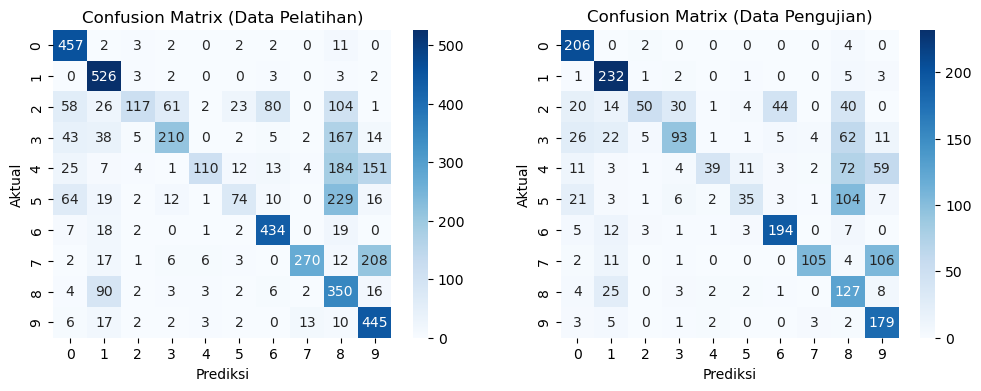

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix untuk data pelatihan
cm_train = confusion_matrix(y_train_70, y_pred_nb_70_30_train)

# Confusion matrix untuk data pengujian
cm_test = confusion_matrix(y_test_30, y_pred_nb_70_30)

# Menampilkan confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Pelatihan)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Pengujian)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.show()

In [33]:
# Rasio 80:20

y_pred_nb_80_20_train = naive_bayes_classifier_80_20.predict(X_train_80)

accuracy_train = accuracy_score(y_train_80, y_pred_nb_80_20_train)
accuracy_test = accuracy_score(y_test_20, y_pred_nb_80_20)

print(f"Akurasi pada data pelatihan: {accuracy_train}")
print(f"Akurasi pada data pengujian: {accuracy_test}")

# Classification report untuk data pelatihan
report_train = classification_report(y_train_80, y_pred_nb_80_20_train)
print(f"Classification Report (Data Pelatihan): \n{report_train}")

Akurasi pada data pelatihan: 0.6046428571428571
Akurasi pada data pengujian: 0.5821428571428572
Classification Report (Data Pelatihan): 
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       563
           1       0.68      0.97      0.80       617
           2       0.82      0.22      0.35       534
           3       0.68      0.45      0.54       563
           4       0.85      0.21      0.34       572
           5       0.64      0.11      0.19       486
           6       0.79      0.90      0.84       563
           7       0.94      0.49      0.64       608
           8       0.32      0.75      0.45       531
           9       0.52      0.89      0.66       563

    accuracy                           0.60      5600
   macro avg       0.69      0.59      0.56      5600
weighted avg       0.69      0.60      0.57      5600



In [34]:
# Classification report untuk data pengujian
report_test = classification_report(y_test_20, y_pred_nb_80_20)
print(f"Classification Report (Data Pengujian): \n{report_test}")

Classification Report (Data Pengujian): 
              precision    recall  f1-score   support

           0       0.62      0.97      0.76       128
           1       0.67      0.96      0.79       167
           2       0.71      0.21      0.32       141
           3       0.63      0.44      0.52       153
           4       0.85      0.24      0.37       144
           5       0.56      0.07      0.13       124
           6       0.77      0.84      0.80       146
           7       0.93      0.44      0.60       146
           8       0.30      0.72      0.43       119
           9       0.48      0.91      0.63       132

    accuracy                           0.58      1400
   macro avg       0.65      0.58      0.53      1400
weighted avg       0.66      0.58      0.54      1400



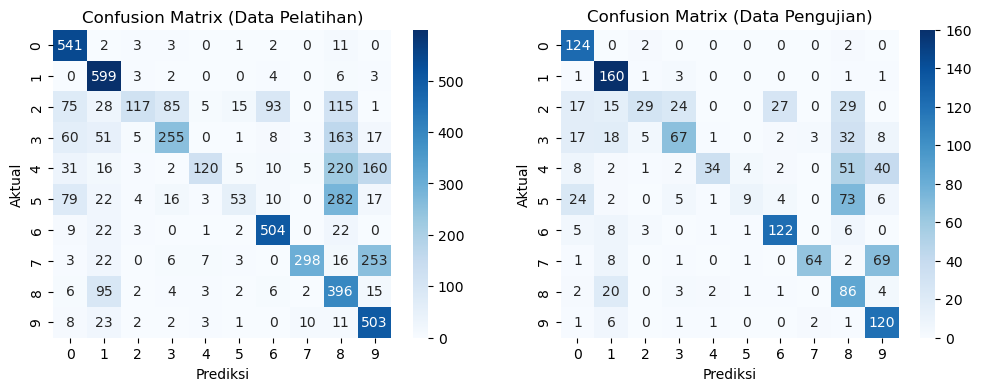

In [35]:
# Confusion matrix untuk data pelatihan
cm_train = confusion_matrix(y_train_80, y_pred_nb_80_20_train)

# Confusion matrix untuk data pengujian
cm_test = confusion_matrix(y_test_20, y_pred_nb_80_20)

# Menampilkan confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Pelatihan)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Pengujian)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.show()

In [36]:
# Rasio 90:10

y_pred_nb_90_10_train = naive_bayes_classifier_90_10.predict(X_train_90)

accuracy_train = accuracy_score(y_train_90, y_pred_nb_90_10_train)
accuracy_test = accuracy_score(y_test_10, y_pred_nb_90_10)

print(f"Akurasi pada data pelatihan: {accuracy_train}")
print(f"Akurasi pada data pengujian: {accuracy_test}")

# Classification report untuk data pelatihan
report_train = classification_report(y_train_90, y_pred_nb_90_10_train)
print(f"Classification Report (Data Pelatihan): \n{report_train}")

Akurasi pada data pelatihan: 0.5757142857142857
Akurasi pada data pengujian: 0.5628571428571428
Classification Report (Data Pelatihan): 
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       630
           1       0.67      0.97      0.79       703
           2       0.85      0.23      0.36       609
           3       0.70      0.35      0.47       643
           4       0.82      0.13      0.22       640
           5       0.59      0.10      0.17       551
           6       0.77      0.88      0.82       631
           7       0.92      0.41      0.56       685
           8       0.29      0.75      0.42       581
           9       0.49      0.91      0.64       627

    accuracy                           0.58      6300
   macro avg       0.68      0.57      0.52      6300
weighted avg       0.68      0.58      0.53      6300



In [37]:
# Classification report untuk data pengujian
report_test = classification_report(y_test_10, y_pred_nb_90_10)
print(f"Classification Report (Data Pengujian): \n{report_test}")

Classification Report (Data Pengujian): 
              precision    recall  f1-score   support

           0       0.63      0.95      0.76        61
           1       0.62      0.96      0.76        81
           2       0.82      0.27      0.41        66
           3       0.57      0.37      0.45        73
           4       0.91      0.13      0.23        76
           5       0.50      0.07      0.12        59
           6       0.78      0.82      0.80        78
           7       0.90      0.39      0.55        69
           8       0.31      0.67      0.42        69
           9       0.46      0.91      0.61        68

    accuracy                           0.56       700
   macro avg       0.65      0.55      0.51       700
weighted avg       0.66      0.56      0.52       700



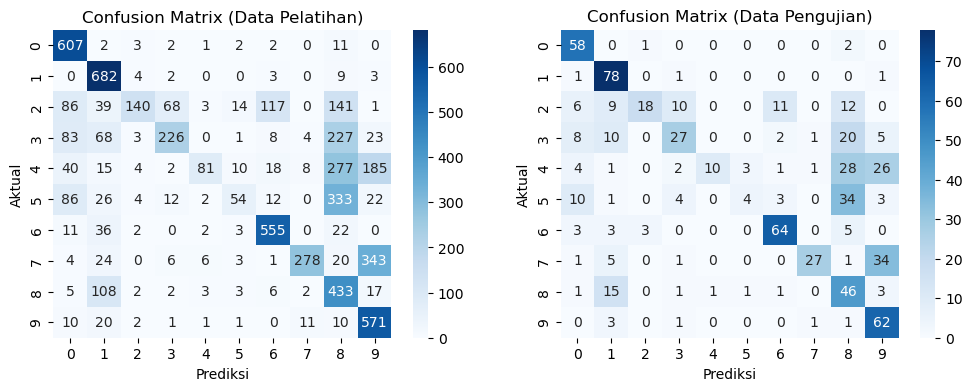

In [38]:
# Confusion matrix untuk data pelatihan
cm_train = confusion_matrix(y_train_90, y_pred_nb_90_10_train)

# Confusion matrix untuk data pengujian
cm_test = confusion_matrix(y_test_10, y_pred_nb_90_10)

# Menampilkan confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Pelatihan)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Pengujian)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.show()

In [39]:
# SVM

# Rasio 70:30

y_pred_svm_70_30_train = naive_bayes_classifier_70_30.predict(X_train_70)

accuracy_train = accuracy_score(y_train_70, y_pred_svm_70_30_train)
accuracy_test = accuracy_score(y_test_30, y_pred_svm_70_30)

print(f"Akurasi pada data pelatihan: {accuracy_train}")
print(f"Akurasi pada data pengujian: {accuracy_test}")

# Classification report untuk data pelatihan
report_train = classification_report(y_train_70, y_pred_svm_70_30_train)
print(f"Classification Report (Data Pelatihan): \n{report_train}")

Akurasi pada data pelatihan: 0.6108163265306122
Akurasi pada data pengujian: 0.9357142857142857
Classification Report (Data Pelatihan): 
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       479
           1       0.69      0.98      0.81       539
           2       0.83      0.25      0.38       472
           3       0.70      0.43      0.54       486
           4       0.87      0.22      0.35       511
           5       0.61      0.17      0.27       427
           6       0.78      0.90      0.84       483
           7       0.93      0.51      0.66       525
           8       0.32      0.73      0.45       478
           9       0.52      0.89      0.66       500

    accuracy                           0.61      4900
   macro avg       0.69      0.60      0.57      4900
weighted avg       0.70      0.61      0.58      4900



In [40]:
# Classification report untuk data pengujian
report_test = classification_report(y_test_30, y_pred_svm_70_30)
print(f"Classification Report (Data Pengujian): \n{report_test}")

Classification Report (Data Pengujian): 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       212
           1       0.98      0.96      0.97       245
           2       0.84      0.97      0.90       203
           3       0.93      0.87      0.90       230
           4       0.95      0.95      0.95       205
           5       0.95      0.92      0.93       183
           6       0.97      0.95      0.96       226
           7       0.95      0.91      0.93       229
           8       0.91      0.93      0.92       172
           9       0.90      0.93      0.91       195

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



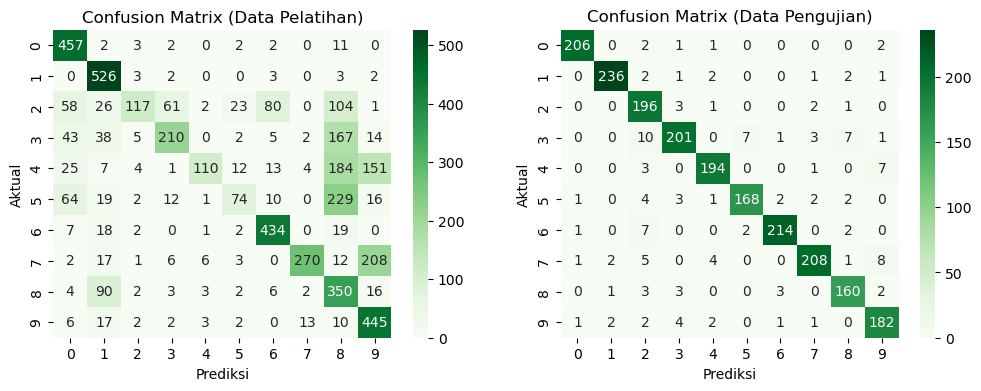

In [41]:
# Confusion matrix untuk data pelatihan
cm_train = confusion_matrix(y_train_70, y_pred_svm_70_30_train)

# Confusion matrix untuk data pengujian
cm_test = confusion_matrix(y_test_30, y_pred_svm_70_30)

# Menampilkan confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Data Pelatihan)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Data Pengujian)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.show()

In [42]:
# Rasio 80:20

y_pred_svm_80_20_train = naive_bayes_classifier_80_20.predict(X_train_80)

accuracy_train = accuracy_score(y_train_80, y_pred_svm_80_20_train)
accuracy_test = accuracy_score(y_test_20, y_pred_svm_80_20)

print(f"Akurasi pada data pelatihan: {accuracy_train}")
print(f"Akurasi pada data pengujian: {accuracy_test}")

# Classification report untuk data pelatihan
report_train = classification_report(y_train_80, y_pred_svm_80_20_train)
print(f"Classification Report (Data Pelatihan): \n{report_train}")

Akurasi pada data pelatihan: 0.6046428571428571
Akurasi pada data pengujian: 0.9392857142857143
Classification Report (Data Pelatihan): 
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       563
           1       0.68      0.97      0.80       617
           2       0.82      0.22      0.35       534
           3       0.68      0.45      0.54       563
           4       0.85      0.21      0.34       572
           5       0.64      0.11      0.19       486
           6       0.79      0.90      0.84       563
           7       0.94      0.49      0.64       608
           8       0.32      0.75      0.45       531
           9       0.52      0.89      0.66       563

    accuracy                           0.60      5600
   macro avg       0.69      0.59      0.56      5600
weighted avg       0.69      0.60      0.57      5600



In [43]:
# Classification report untuk data pengujian
report_test = classification_report(y_test_20, y_pred_svm_80_20)
print(f"Classification Report (Data Pengujian): \n{report_test}")

Classification Report (Data Pengujian): 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       128
           1       0.98      0.96      0.97       167
           2       0.85      0.96      0.90       141
           3       0.92      0.86      0.89       153
           4       0.94      0.94      0.94       144
           5       0.92      0.96      0.94       124
           6       0.98      0.95      0.96       146
           7       0.97      0.92      0.95       146
           8       0.94      0.93      0.94       119
           9       0.92      0.93      0.92       132

    accuracy                           0.94      1400
   macro avg       0.94      0.94      0.94      1400
weighted avg       0.94      0.94      0.94      1400



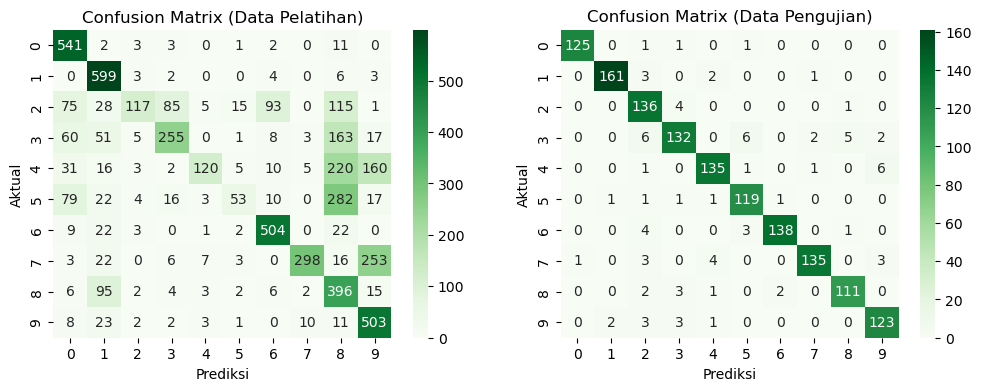

In [44]:
# Confusion matrix untuk data pelatihan
cm_train = confusion_matrix(y_train_80, y_pred_svm_80_20_train)

# Confusion matrix untuk data pengujian
cm_test = confusion_matrix(y_test_20, y_pred_svm_80_20)

# Menampilkan confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Data Pelatihan)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Data Pengujian)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.show()

In [45]:
# Rasio 90:10

y_pred_svm_90_10_train = naive_bayes_classifier_90_10.predict(X_train_90)

accuracy_train = accuracy_score(y_train_90, y_pred_svm_90_10_train)
accuracy_test = accuracy_score(y_test_10, y_pred_svm_90_10)

print(f"Akurasi pada data pelatihan: {accuracy_train}")
print(f"Akurasi pada data pengujian: {accuracy_test}")

# Classification report untuk data pelatihan
report_train = classification_report(y_train_90, y_pred_svm_90_10_train)
print(f"Classification Report (Data Pelatihan): \n{report_train}")

Akurasi pada data pelatihan: 0.5757142857142857
Akurasi pada data pengujian: 0.95
Classification Report (Data Pelatihan): 
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       630
           1       0.67      0.97      0.79       703
           2       0.85      0.23      0.36       609
           3       0.70      0.35      0.47       643
           4       0.82      0.13      0.22       640
           5       0.59      0.10      0.17       551
           6       0.77      0.88      0.82       631
           7       0.92      0.41      0.56       685
           8       0.29      0.75      0.42       581
           9       0.49      0.91      0.64       627

    accuracy                           0.58      6300
   macro avg       0.68      0.57      0.52      6300
weighted avg       0.68      0.58      0.53      6300



In [46]:
# Classification report untuk data pengujian
report_test = classification_report(y_test_10, y_pred_svm_90_10)
print(f"Classification Report (Data Pengujian): \n{report_test}")

Classification Report (Data Pengujian): 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       1.00      0.95      0.97        81
           2       0.89      0.98      0.94        66
           3       0.94      0.88      0.91        73
           4       0.94      0.95      0.94        76
           5       0.92      0.95      0.93        59
           6       0.96      0.96      0.96        78
           7       0.96      0.96      0.96        69
           8       0.97      0.96      0.96        69
           9       0.93      0.94      0.93        68

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700



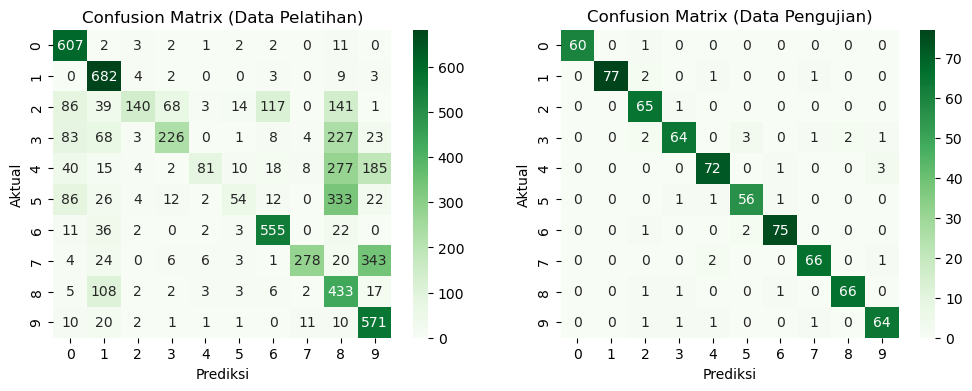

In [47]:
# Confusion matrix untuk data pelatihan
cm_train = confusion_matrix(y_train_90, y_pred_svm_90_10_train)

# Confusion matrix untuk data pengujian
cm_test = confusion_matrix(y_test_10, y_pred_svm_90_10)

# Menampilkan confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Data Pelatihan)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Data Pengujian)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.show()

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

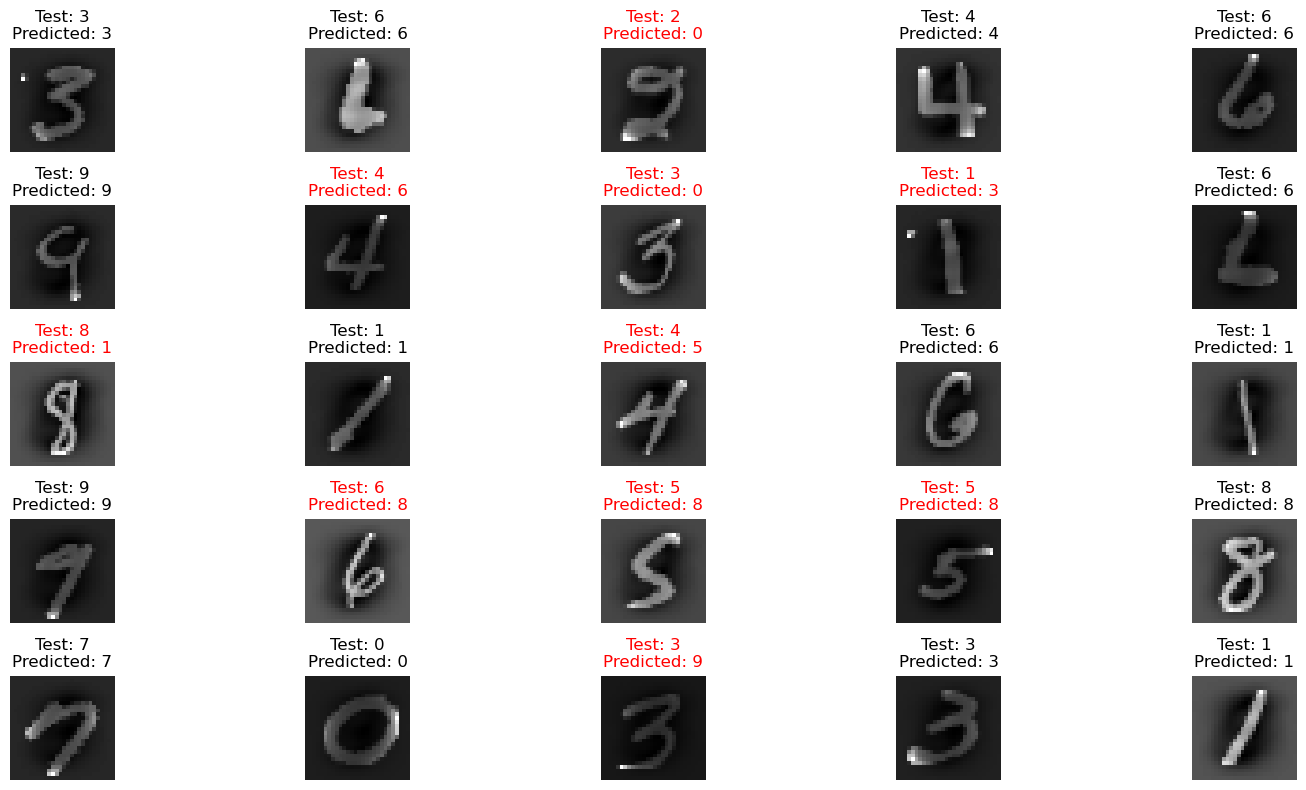

In [65]:
# Naive Baiyes

# Rasio 70:30

# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test_30[:n_images]
sample_labels = y_test_30[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred_nb_70_30[i]}", 
              color='black' 
              if sample_labels[i] == y_pred_nb_70_30[i] 
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

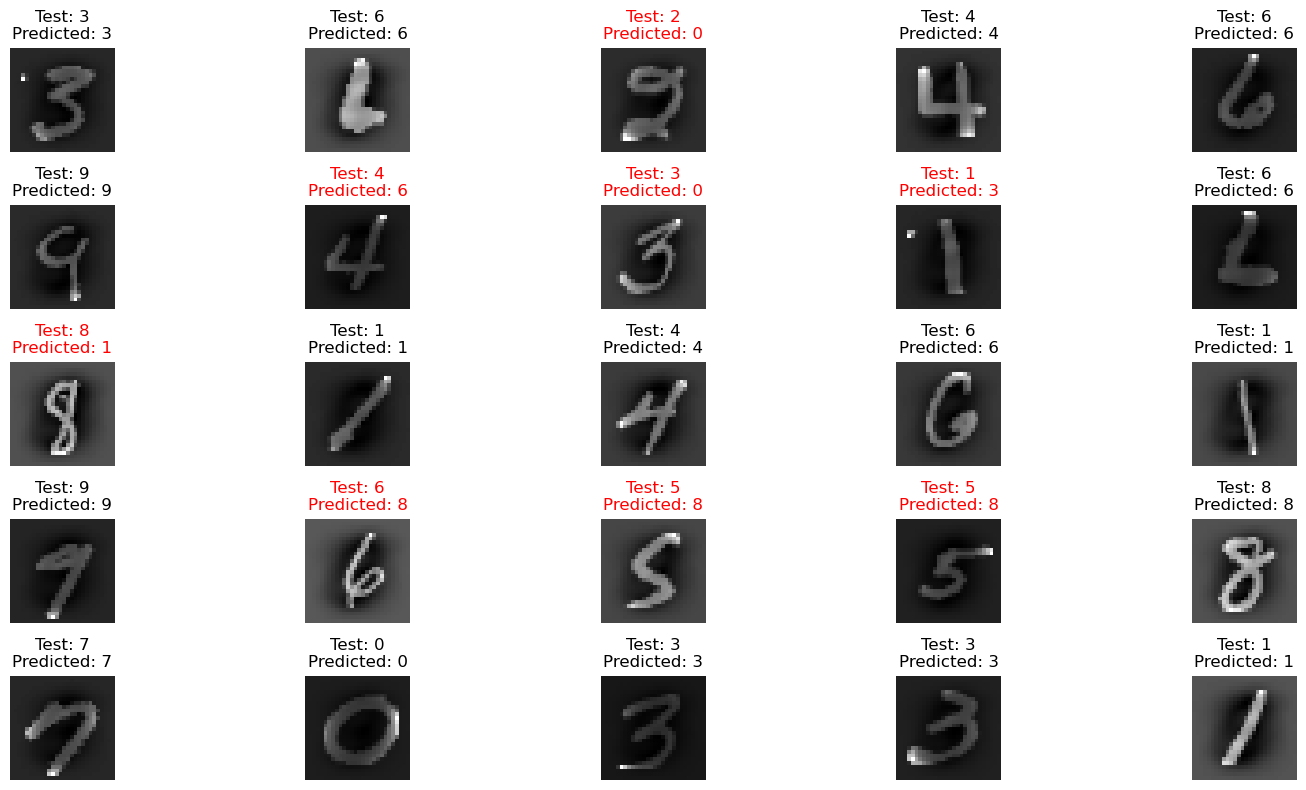

In [66]:
# Rasio 80:20

# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test_20[:n_images]
sample_labels = y_test_20[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred_nb_80_20[i]}", 
              color='black' 
              if sample_labels[i] == y_pred_nb_80_20[i] 
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

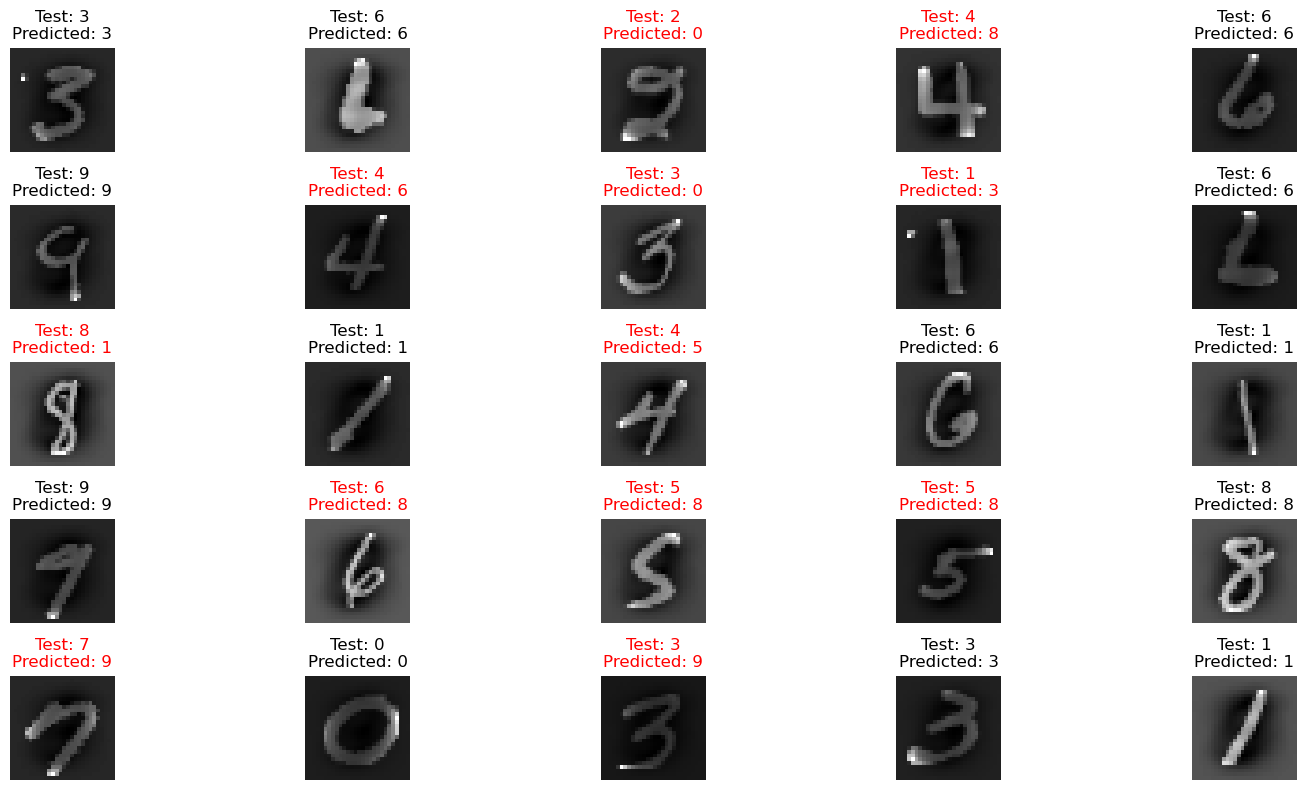

In [67]:
# Rasio 90:10

# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test_10[:n_images]
sample_labels = y_test_10[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred_nb_90_10[i]}", 
              color='black' 
              if sample_labels[i] == y_pred_nb_90_10[i] 
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

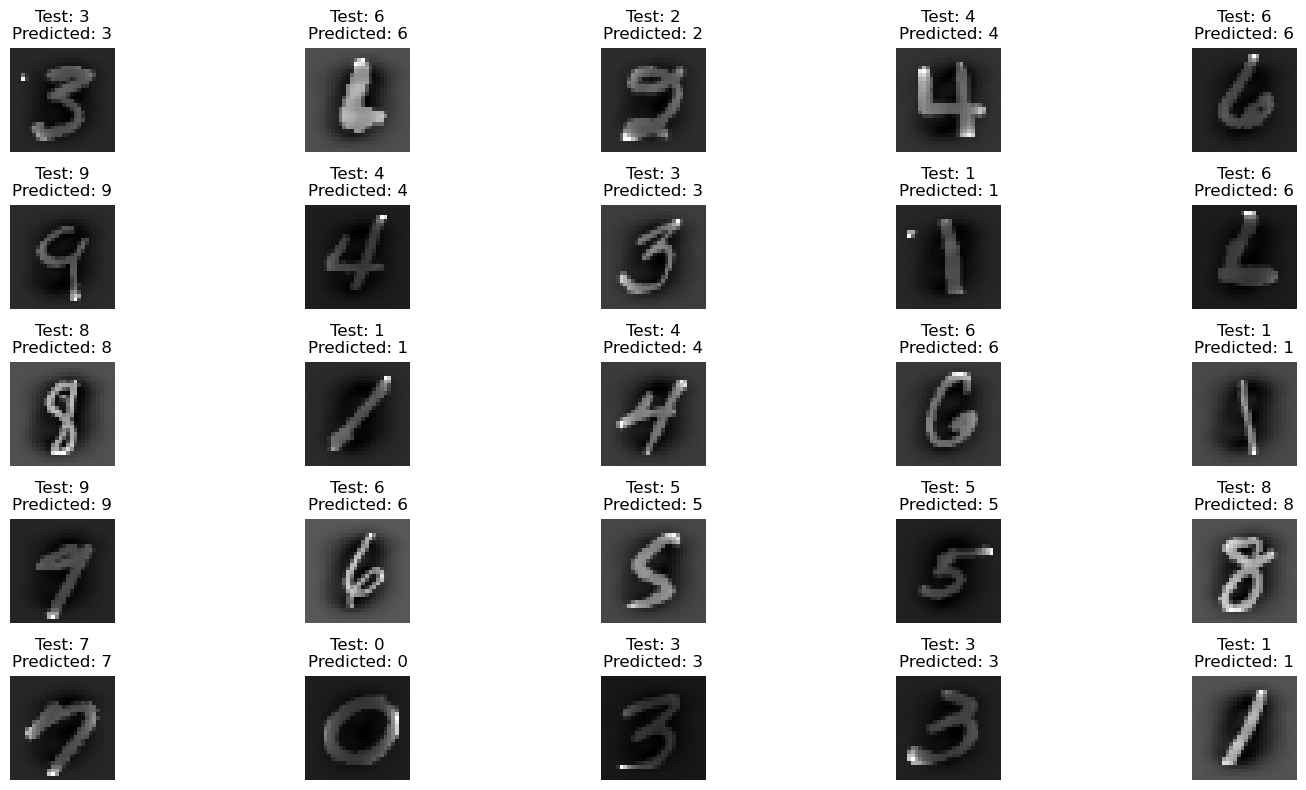

In [68]:
# SVM

# Rasio 70:30

# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test_30[:n_images]
sample_labels = y_test_30[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred_svm_70_30[i]}", 
              color='black' 
              if sample_labels[i] == y_pred_svm_70_30[i] 
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

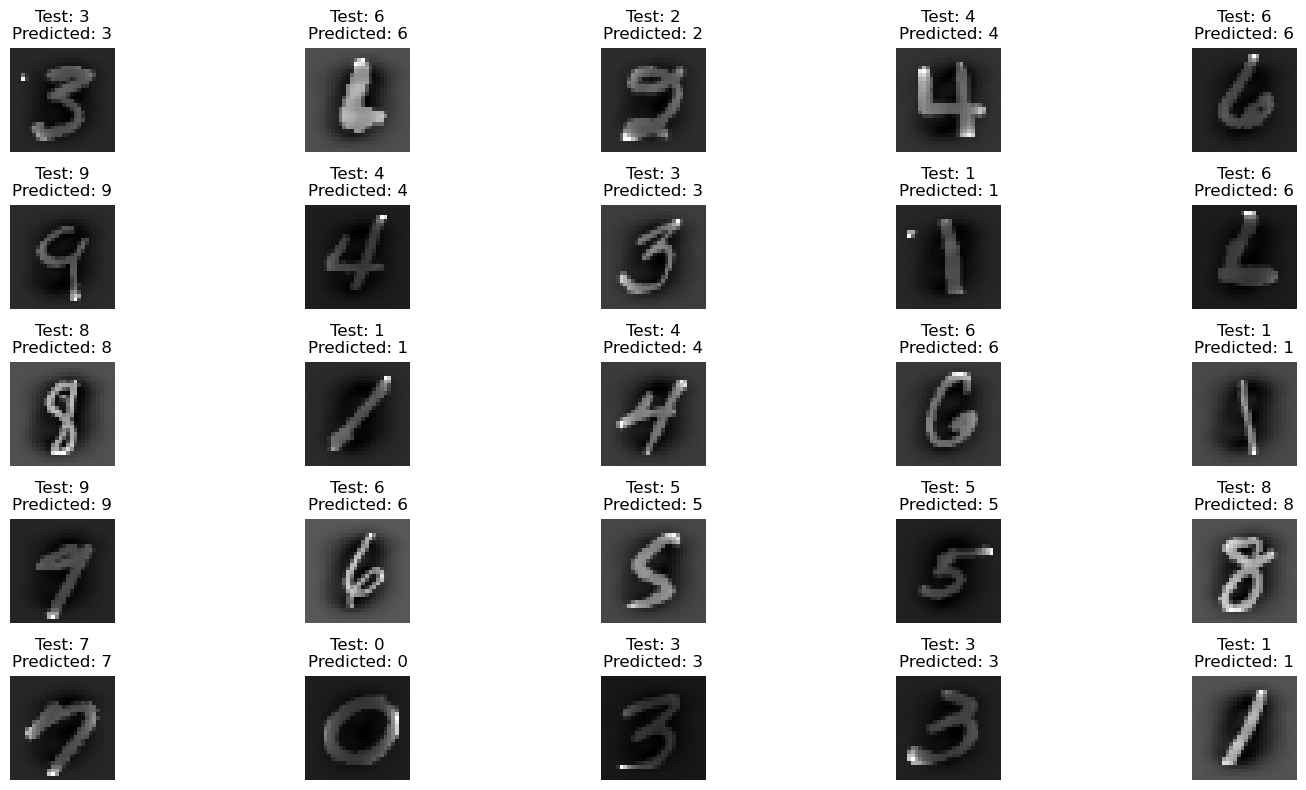

In [69]:
# Rasio 80:20

# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test_20[:n_images]
sample_labels = y_test_20[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred_svm_80_20[i]}", 
              color='black' 
              if sample_labels[i] == y_pred_svm_80_20[i] 
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

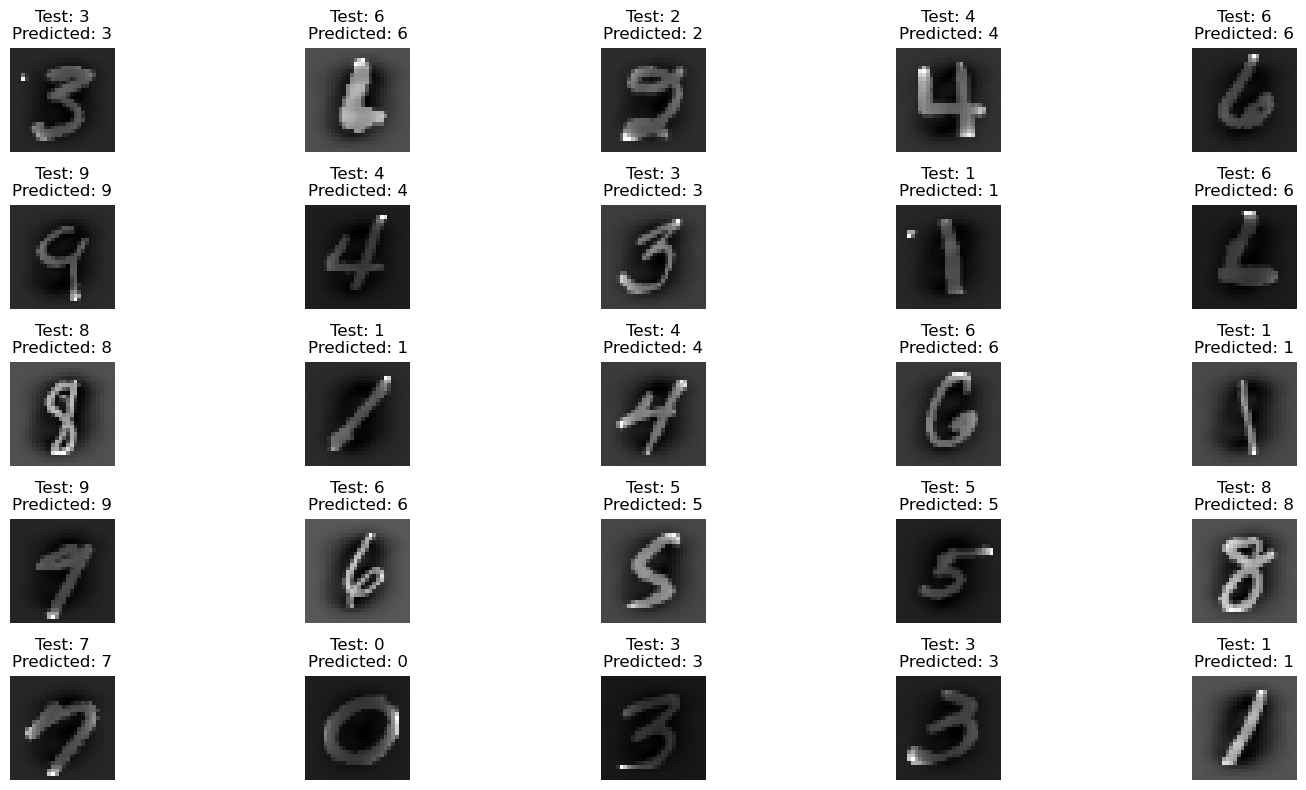

In [70]:
# Rasio 90:10

# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test_10[:n_images]
sample_labels = y_test_10[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred_svm_90_10[i]}", 
              color='black' 
              if sample_labels[i] == y_pred_svm_90_10[i] 
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

- Model terbaik berdasarkan uji coba diatas adalah dengan menggunakan model SVC, yaitu memiliki akurasi pada data test sebesar 0.95 saat menggunakan 90% data training dan 10% data test dan decomposition PCA. Hal ini juga diikuti parameter terbaik dengan 'svc__C': 5 serta 'svc__gamma': 0.005, selanjutnya menggunakan konfigurasi SVC dengan kernel='rbf' dan class_weight='balanced'. Perbandingan yang sangat signifikan antara Naive Baiyes dengan SVC dari setiap citra yang dihasilkan walaupun sama-sama menggunakan data sempel berupa 1/10 data keseluruhan.
